In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn
sns.set()

from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [2]:
data = pd.read_csv('C://Users//user//Desktop//creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
data.shape

(284807, 31)

In [5]:
data.describe()

#we have 284807 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#take 20% of the data

data = data.sample(frac = 0.2, random_state = 1)

data.shape


(56961, 31)

<function matplotlib.pyplot.show(*args, **kw)>

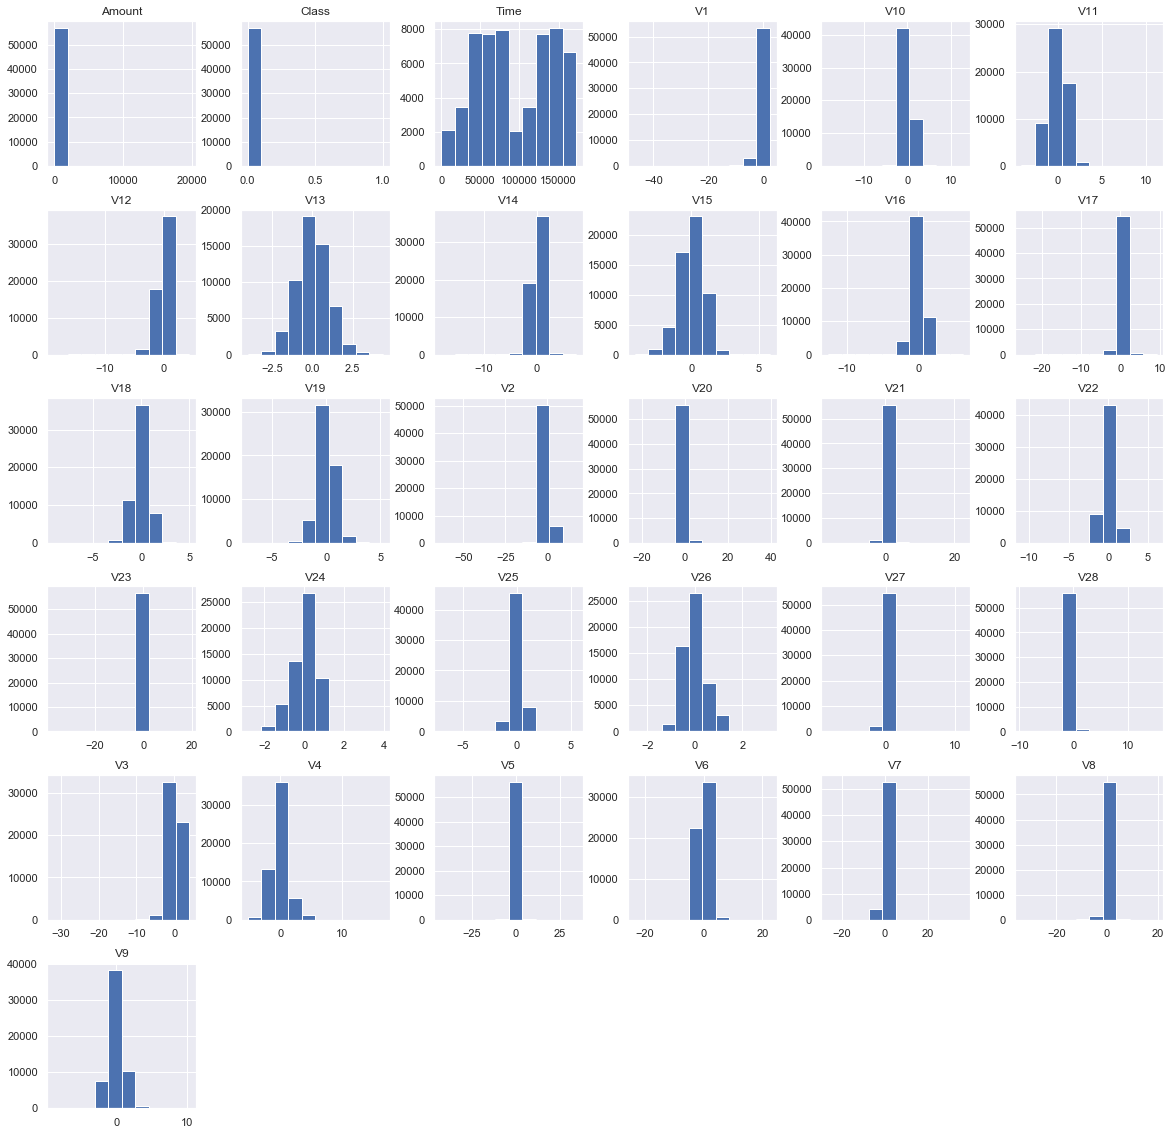

In [7]:
#plot histigram of each parameter

data.hist(figsize=(20,20))
plt.show

#we can see most of V's are clustered right around 0 with some fairly large outliers or maybe no outliers in regards

In [8]:
#Determine number of fraud cases in dataset

fraud = data.loc[data['Class'] ==1]
valid = data.loc[data['Class']==0]

outlier_fraction = len(fraud)/float(len(valid))
outlier_fraction


0.0015296972254457222

In [9]:
'Fraud Cases : {}'.format(len(fraud))

'Fraud Cases : 87'

In [10]:

'Valid Cases : {}'.format(len(valid))


'Valid Cases : 56874'

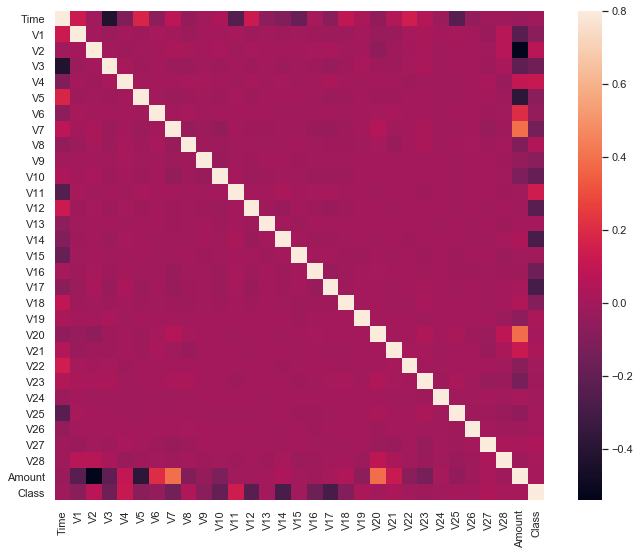

In [28]:
#Correlation matrix

corrmatrix = data.corr()
fig = plt.figure(figsize=(12,9))

sns.heatmap(corrmatrix, vmax =0.8, square = True)


#

In [29]:
#got all the columns from the dataframe

columns = data.columns.tolist()

#filter the columns to remove data we do not want

columns = [c for c in columns if c not in ['Class']]

#store the variable we will be predictiong on 

target = 'Class'

x= data[columns]
y=data[target]

#print the shape of x and y

x.shape
y.shape

(56961,)

In [30]:
x.shape

(56961, 30)

In [38]:
#define a random sate

state = 1

#define th outlier detection methods

classifiers = {
    'Isolation Forest' : IsolationForest(max_samples = len(x),
                                         contamination = outlier_fraction,
                                         random_state = state),
    'Local Outlier Factor': LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction)
}

In [46]:
#fit the model

n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    #fit the data and tag outliers
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(x)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(x)
        scores_pred = clf.decision_function(x)
        y_pred = clf.predict(x)
        
    #reshape the prediction values to 0 for valid , 1 for fraud, 
    
    y_pred[y_pred == 1] =0
    y_pred[y_pred == -1] = 1
    
    
    n_errors = ( y_pred != y).sum()
    
    # run classification metrics
    
    '{}: {}'.format(clf_name, n_errors)
    
    
    

In [47]:
accuracy_score(y,y_pred)

0.9969628342199048

In [48]:
classification_report(y,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     56874\n           1       0.01      0.01      0.01        87\n\n    accuracy                           1.00     56961\n   macro avg       0.50      0.50      0.50     56961\nweighted avg       1.00      1.00      1.00     56961\n'

In [50]:
confusion_matrix(y,y_pred)

array([[56787,    87],
       [   86,     1]], dtype=int64)

In [11]:
fraud = data.loc[data['Class'] ==1]
normal = data.loc[data['Class']==0]

In [12]:
fraud.count()

fraud.sum()

Time      7.157876e+06
V1       -3.451071e+02
V2        2.621871e+02
V3       -5.461669e+02
V4        3.741749e+02
V5       -2.388062e+02
V6       -1.155150e+02
V7       -3.899422e+02
V8        9.720676e+01
V9       -1.901461e+02
V10      -4.455405e+02
V11       3.123484e+02
V12      -5.194897e+02
V13       1.936104e+00
V14      -5.914441e+02
V15      -8.040610e+00
V16      -3.198558e+02
V17      -5.316145e+02
V18      -1.730703e+02
V19       4.139649e+01
V20       1.456421e+01
V21       4.586718e+01
V22      -2.851727e+00
V23      -2.079543e+01
V24      -2.241870e+00
V25       8.922096e+00
V26       4.710742e-01
V27       2.696340e+01
V28       6.069774e+00
Amount    1.372574e+04
Class     8.700000e+01
dtype: float64

In [13]:
len(normal)

56874

In [14]:
len(fraud)

87

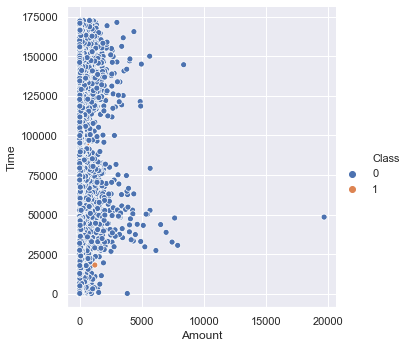

In [15]:
sns.relplot(x='Amount', y ='Time', hue ='Class', data = data)

In [16]:
x = data.iloc[:,:-1]
y = data['Class']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.35)

In [18]:
clf = linear_model.LogisticRegression(C=1e5)

In [19]:
clf.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred = (clf.predict(x_test))

In [21]:
print(confusion_matrix(y_test,y_pred))

[[19900     7]
 [   10    20]]


In [22]:
print(accuracy_score(y_test,y_pred))

0.9991473140392235


In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19907
           1       0.74      0.67      0.70        30

    accuracy                           1.00     19937
   macro avg       0.87      0.83      0.85     19937
weighted avg       1.00      1.00      1.00     19937



In [24]:
#test

a=[[1.792993,0.863291,0.010309]]
a=s.transform(a)
b=clf.predict(a)
b

NameError: name 's' is not defined